## 1. 訓練資料集
- 產生 500 個 0-1 之間的 x，對應 y 值為 0
- 產生 500 個 1-2 之間的 x，對應 y 值為 1
- 合併成為共 1000 個訓練資料

(1000, 1)
(1000,)


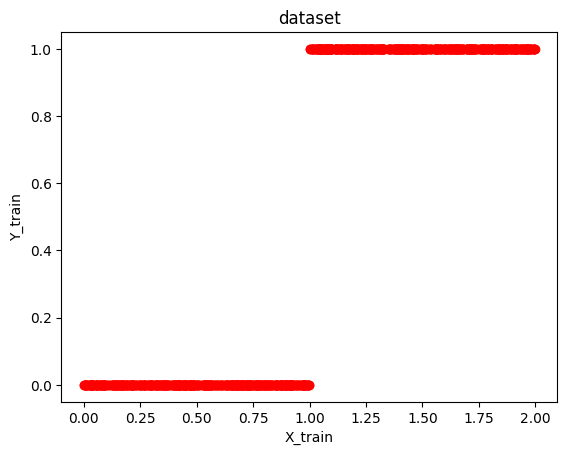

In [1]:
# 產生隨機的訓練資料
import tensorflow as tf
import numpy as np

total = 500
x1 = np.random.random((total, 1))  # 第一組
x2 = np.random.random((total, 1))+1  # 第二組
x_train = np.concatenate((x1, x2))

y1 = np.zeros((total,), dtype=int)  # 第一組
y2 = np.ones((total,), dtype=int)  # 第二組
y_train = np.concatenate((y1, y2))

# 資料形狀
print(x_train.shape)
print(y_train.shape)

# 畫出圖形
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'ro')
plt.title('dataset')
plt.ylabel('Y_train')
plt.xlabel('X_train')
plt.show()


In [2]:
# 建立模型 MLP
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_dim=1),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 152 (608.00 Byte)
Trainable params: 152 (608.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
# 編譯及訓練
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=120, batch_size=128, verbose=1)

Epoch 1/120
8/8 [==============================] - 2s 7ms/step - loss: 0.7029 - accuracy: 0.5000
Epoch 2/120
8/8 [==============================] - 0s 6ms/step - loss: 0.6980 - accuracy: 0.4670
Epoch 3/120
8/8 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.3870
Epoch 4/120
8/8 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 5/120
8/8 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5000
Epoch 6/120
8/8 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5200
Epoch 7/120
8/8 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5540
Epoch 8/120
8/8 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.5700
Epoch 9/120
8/8 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6060
Epoch 10/120
8/8 [==============================] - 0s 5ms/step - loss: 0.6617 - accuracy: 0.6280
Epoch 11/120
8/8 [===========

In [4]:
# 測試
x_test = np.array([[0.22], [0.31], [1.22], [1.33]])
y_test = np.array([0, 0, 1, 1])

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('Loss:', loss)
print('Accuracy:', accuracy)


1/1 [==============================] - 0s 490ms/step - loss: 0.0383 - accuracy: 1.0000
Loss: 0.03830506652593613
Accuracy: 1.0


In [5]:
# 預測
predict = model.predict(x_test)
print('predict:', predict)
print('predict class:', np.argmax(predict[0]), np.argmax(predict[1]), np.argmax(predict[2]), np.argmax(predict[3]))

# predict2 = model.predict_classes(x_test)  # 舊版本，Deprecated
# print('predict_classes:', predict2)
print('y_test', y_test[:])


1/1 [==============================] - 0s 179ms/step
predict: [[0.9624577  0.03754232]
 [0.9624577  0.03754232]
 [0.05843216 0.9415679 ]
 [0.01634608 0.98365396]]
predict class: 0 0 1 1
y_test [0 0 1 1]


## 2. 分析學習過程

In [6]:
# 查看 history
print(history.history)
print(history.history.keys())
print(len(history.history['loss']))

{'loss': [0.7029439210891724, 0.6979729533195496, 0.6932056546211243, 0.6885309815406799, 0.6841180324554443, 0.6797655820846558, 0.6754436492919922, 0.6709378957748413, 0.6663926839828491, 0.6617311835289001, 0.6568611860275269, 0.6521379351615906, 0.6468799114227295, 0.6416183114051819, 0.6362432837486267, 0.6305093765258789, 0.6247223019599915, 0.6186293959617615, 0.61241614818573, 0.6058954000473022, 0.5984832644462585, 0.5902833938598633, 0.5816358327865601, 0.5726461410522461, 0.5630543231964111, 0.5529267191886902, 0.5427383780479431, 0.5319573283195496, 0.5211077332496643, 0.5099658966064453, 0.498806357383728, 0.48751264810562134, 0.47615399956703186, 0.4648354649543762, 0.4534381628036499, 0.44232651591300964, 0.43127813935279846, 0.42038947343826294, 0.4097224473953247, 0.39930447936058044, 0.3891010880470276, 0.37909436225891113, 0.36956703662872314, 0.3599310517311096, 0.3506864011287689, 0.34158840775489807, 0.33284303545951843, 0.32427486777305603, 0.31592345237731934, 0

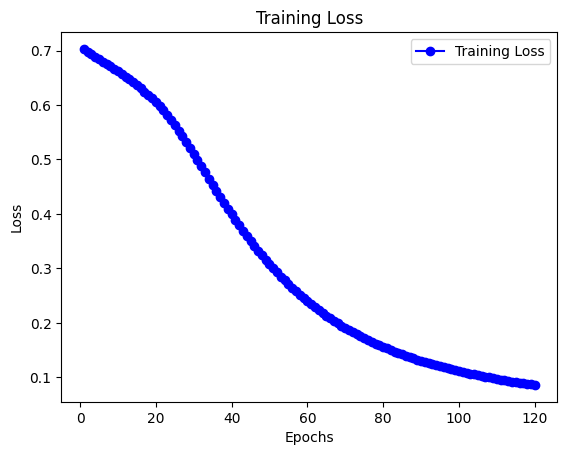

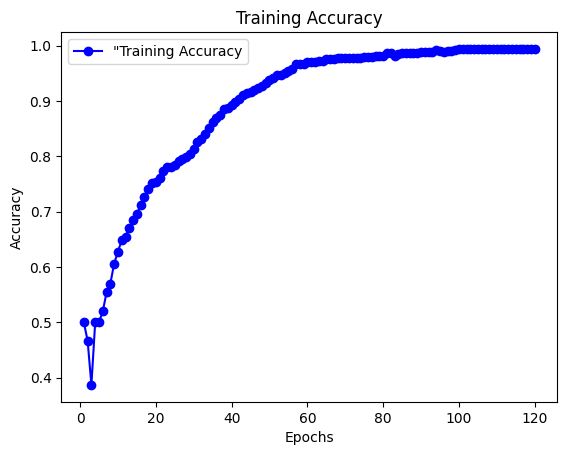

In [7]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt

# 顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 顯示訓練和正確度
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo-', label='"Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 刪除模型

In [8]:
from tensorflow.keras import backend       #後端模組
backend.clear_session()
del model